# Linear Regression 1

*Author: Evan Carey*

*Copyright 2017, BH Analytics, LLC*

## Overview

The purpose of this lecture is to go over linear regression, which is the foundation of modern frequentist statistics. We will examine linear regression with a single and multiple predictors, as well as basic non-linear functions. We will consider the assumptions of linear regression, and map that to the actual statistical model we are fitting. 

## Libraries

In [1]:
## Import Modules
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import seaborn as sns

In [2]:
## Enable inline plotting for graphics
%matplotlib inline

In [3]:
## Get Version information
print(sys.version)
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("Statsmodels version: {0}".format(statsmodels.__version__))

3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.19.2
Matplotlib version: 2.0.0
Numpy version: 1.11.3
Statsmodels version: 0.6.1


## Check your working directory

Subsequent sessions may require you to identify and update your working directory so paths correctly point at the downloaded data files. You can check your working directory like so:

In [4]:
## Check/set your working directory
print("My working directory:\n" + os.getcwd())
# Set Working Directory (if needed)
os.chdir(r"C:\Users\evan\Dropbox\BH_Katie_Share\Goldman_Sachs")
print("My new working directory:\n" + os.getcwd())

My working directory:
C:\Users\evan\Dropbox\BH_Katie_Share\Goldman_Sachs\Intermediate_python\notebooks
My new working directory:
C:\Users\evan\Dropbox\BH_Katie_Share\Goldman_Sachs


## Linear Regression

* Heart of modern frequentist statistics
* Explore relationships between predictors and an outcome
* Many different types of regression
* Some examples of regression you currently use
* What type of data?
* What size of data?
* What are your outputs?
* Regression

## Different Types of Regression

There are many different types of regression (listed below). All of the lessons we learn in basic linear regression will apply to the other forms of general linear regression, as well as other multivariate parametric modelling strategies. 

* OLS Regression, or simple linear regression
* Multiple Linear Regression
* Logistic Regression
* Cox Time to Event Analysis
* Mixed Effects (or hierarchical)
* Repeated Measures (time series)
* Non-parametric

## General Regression Strategy

* Collect appropriate data
* Identify Outcomes / predictors
* Investigate "shape" of data
* Consider appropriate functional form
* Apply prior knowledge
* Select "best" model and variables
* Check model for validity (residuals, etc)
* Apply model
* Predict new results

## OLS Regression

* "Basic" regression
* Easy to learn conceptually, applies to other situations
* Outcome is a continuous variable
* Predicting weight
* Predicting monetary values
* Predicting Lab tests

## Linear Regression Assumptions

* Assumptions: this is key
* Normality
* Independence
* Linearity
* Homoscedasticity (pull this off in scrabble)
* What's all this about assumptions. . . If I get numbers out it worked. . .

## Example of Regression: Predicting Miles per Gallon

We will learn about regression in the context of a simple example of making inference on miles per gallon in a dataset of cars. This is a classic dataset that has been used in other tutorials, you may recognize it. 

We will begin by importing the dataset with pandas.

In [5]:
mtcars = pd.read_csv(r'C:\Users\evan\Dropbox\BH_Katie_Share\Goldman_Sachs\data\mtcars.csv')
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

The variable we are interested in predicting is 'mpg' (miles per gallon). This is the fuel efficiency of the vehicle. We will be predicting the mean mpg.

We start off by creating a simple null model. In the absence of any other other information, what is our best estimate of the mean mpg for this dataset? 

It is simply the sample mean. 

In [6]:
mtcars.mpg.mean()

20.090624999999996

Another relevant parameter is the spread of the data. This is approximated by calculating the sample standard deviation

In [7]:
mtcars.mpg.std()

6.026948052089105

We can also visually examine the distribution of this data. 

C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


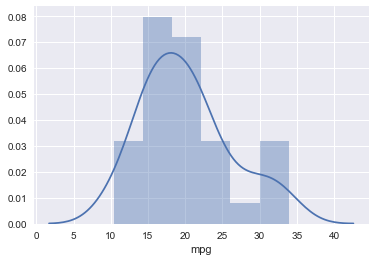

In [8]:
sns.distplot(mtcars.mpg)

## First Linear Model: Null model

There is a direct paralell to what we just did in linear modelling. We can fit the intercept only model, or the "null" model and we will estimate the sample mean. 

Here is the actual model we are fitting:

$$ mean(mpg)=\beta_0 + e$$

$$ \overline{mpg}=\beta_0 + e$$

Where $e$ is the error term that is normally distributed with mean=0 and variance = $\sigma^2$

In [9]:
mod0 = smf.ols('mpg ~ 1', data=mtcars).fit()
mod0.summary()

C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\statsmodels\regression\linear_model.py:1191: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 12 Apr 2017   Prob (F-statistic):                nan
Time:                        13:48:56   Log-Likelihood:                -102.38
No. Observations:                  32   AIC:                             206.8
Df Residuals:                      31   BIC:                             208.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.0906      1.065     18.857      0.000        17.918    22.264
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.241
Skew:                           0.640   Prob(JB):                        0.326
Kurtosis:                       2.799   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model: Single predictor

Our second model will include a single categorical predictor. In this case we will use am (type of transmission) as a predictor and see if mpg depends on transmission. We could start by doing this using grouped analysis with pandas:

In [10]:
mtcars.groupby('am').mpg.mean()

am
0    17.147368
1    24.392308
Name: mpg, dtype: float64

am
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: mpg, dtype: object

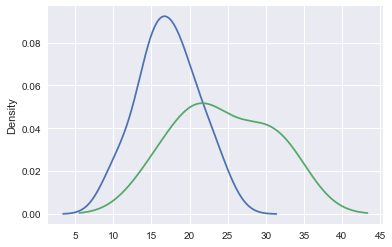

In [11]:
mtcars.groupby('am').mpg.plot(kind='kde')

There seems to be a difference in MPG for the different type of transmissions. We can fit a linear model that includes this as a predictor to get a statistical test. The model we are fitting looks like this:

$$ \overline{mpg}=\beta_0 + \beta_{am}*(am) + e$$


The intercept is implied in this model, so we do not need to include the + 1. 

In [12]:
mod1 = smf.ols('mpg ~ 1 + C(am)', data=mtcars).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     16.86
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           0.000285
Time:                        13:48:56   Log-Likelihood:                -95.242
No. Observations:                  32   AIC:                             194.5
Df Residuals:                      30   BIC:                             197.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.1474      1.125     15.247      0.000        14.851    19.444
C(am)[T.1]     7.2449      1.764      4.106      0.000         3.642    10.848
==============================================================================
Omnibus:                        0.480   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.589
Skew:                           0.051   Prob(JB):                        0.745
Kurtosis:                       2.343   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can you look at the parameter estimate, and figure out what the coefficients mean?

Here is the model equation with the parameter estimates:

$$ \overline{mpg}=17.1 + 7.2*(am) + e$$

There seems to be a difference by transmission type. However, is this difference statisticallye significant? What null hypothesis is the p-value associated with this parameter testing? 

If there were no difference, then $\beta_{am}$ would be equal to 0. So the null hypothesis is:

$\beta_{am} = 0$ 

The p-value is quite small, so we reject this null hypothesis as unlikely given the data, and conclude that $\beta_{am}$ is not equal to 0. 

## Model: Categorical predictor with more than 2 levels

What is our categorical predictor has more than two levels? Cylinder has 3 possible values in this dataset. We may wish to understand how mean MPG varies by the number of cylinders in the car. Here are some non-modelling approached to doing this:

In [13]:
mtcars.groupby('cyl').mpg.mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

cyl
4    Axes(0.125,0.125;0.775x0.755)
6    Axes(0.125,0.125;0.775x0.755)
8    Axes(0.125,0.125;0.775x0.755)
Name: mpg, dtype: object

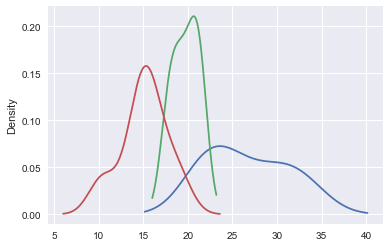

In [14]:
mtcars.groupby('cyl').mpg.plot(kind='kde')

It looks like cylinder is associated with mpg in this data. Let's fit a regression model to further investigate this relationship. Here is our new model equation:

$$ \overline{mpg}=\beta_0 + \beta_{cyl6}*(cyl==6) + \beta_{cyl8}*(cyl==8) + e$$


Why did I not include a term for cyl==4? 

Because it is absorbed into the intercept. 

Here is the code to actually fit the model:

In [15]:
mod2 = smf.ols('mpg ~ C(cyl)', data=mtcars).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     39.70
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           4.98e-09
Time:                        13:48:57   Log-Likelihood:                -81.282
No. Observations:                  32   AIC:                             168.6
Df Residuals:                      29   BIC:                             173.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      26.6636      0.972     27.437      0.000        24.676    28.651
C(cyl)[T.6]    -6.9208      1.558     -4.441      0.000       -10.108    -3.734
C(cyl)[T.8]   -11.5636      1.299     -8.905      0.000       -14.220    -8.908
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.305
Skew:                           0.187   Prob(JB):                        0.859
Kurtosis:                       2.702   Cond. No.                         3.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here is the model with the parameters:

$$ \overline{mpg}=26.7 - 6.9*(cyl==6) - 11.6*(cyl==8) $$

What is the expected value of mpg for a 6 cylinder car with this model?

$$ \overline{mpg}=26.7 - 6.9*(1) - 11.6*(0) $$

In [16]:
26.7 - 6.9*1 - 11.6*0

19.799999999999997

What if I did not include the C() in my model formula? In that case, I would be treating cylinder as a numeric variable. 

In [17]:
mod3 = smf.ols('mpg ~ cyl', data=mtcars).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     79.56
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           6.11e-10
Time:                        13:48:57   Log-Likelihood:                -81.653
No. Observations:                  32   AIC:                             167.3
Df Residuals:                      30   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.8846      2.074     18.268      0.000        33.649    42.120
cyl           -2.8758      0.322     -8.920      0.000        -3.534    -2.217
==============================================================================
Omnibus:                        1.007   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.874
Skew:                           0.380   Prob(JB):                        0.646
Kurtosis:                       2.720   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is the model that I just fit?

$$ \overline{mpg}=\beta_0 + \beta_{cyl}*(cyl) + e$$

That is an odd model. What is my prediction of mpg for a 4 cylinder car?

$$ \overline{mpg}=37.9 - 2.87*(4)$$

In [18]:
37.9 - 2.87*(4)

26.419999999999998

And here is a visual of the model we just fit:

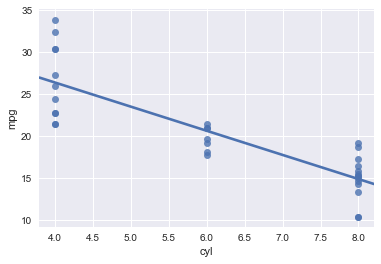

In [19]:
sns.regplot('cyl','mpg',
            data=mtcars,
           ci=None)

It actually doesn't look unreasonable here, but note it is not the same model as the categorical version!

We fit the variable as a continuous predictor. Let's investigate that further...

## Model: Continuous Predictor

What about using a continuous predictor in the equation? This is similar to doing a correlation, but not exactly. Let's assume there is a linear relationship between mpg and disp (size of the engine). Here is a figure demonstrating that relationship:

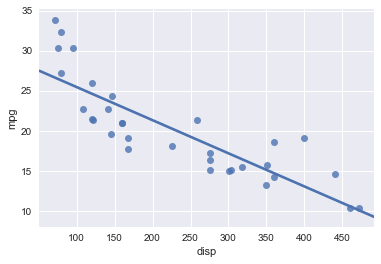

In [20]:
sns.regplot('disp','mpg',
            data=mtcars,
           ci=None)

This looks like a reasonable fit, althought we will look at a non-linear fit next. The regression model we will fit for this data looks like this:

$$ \overline{mpg}=\beta_0 + \beta_{disp}*(disp) + e$$

We are assuming a linear trend of disp on mpg with this model. We can fit is easily like so:

In [21]:
mod3 = smf.ols('mpg ~ disp', data=mtcars).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           9.38e-10
Time:                        13:48:57   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000        27.088    32.111
disp          -0.0412      0.005     -8.747      0.000        -0.051    -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here is the model with the estimated parameters:

$$ \overline{mpg}=29.6 - 0.0412*(disp)$$

The average displacement among all cars is:

In [22]:
mtcars.disp.mean()

230.72187500000004

So for a car with displacement = 200, our predicted mpg would be:

$$ \overline{mpg}=29.6 - 0.0412*(200)$$

In [23]:
29.6 - 0.0412*(200)

21.36

And for a car with displacement = 250, our predicted mpg would be:

$$ \overline{mpg}=29.6 - 0.0412*(250)$$

In [24]:
29.6 - 0.0412*(250)

19.3

## Model: Polynomial regression

It looks like the assumption of linearity may be untrue for displacement. Perhaps a non-linear function would provide a better fit of the data? 

Here is a visual of a polynomial regression option:

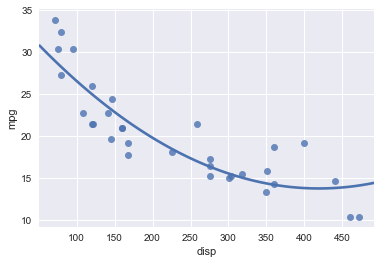

In [25]:
sns.regplot('disp','mpg',
            data=mtcars,
           ci=None,
           order=2)

We can fit this model by specifying an $x^2$ term in the model. 

$$ \overline{mpg}=\beta_{int} + \beta_{disp}*(disp) + \beta_{disp2}*(disp^2) + e$$

We use the I() wrapper to ask for an actual mathematical evaluation of the term. 

In [26]:
mod4 = smf.ols('mpg ~ disp + I(disp**2)', data=mtcars).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     55.46
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           1.23e-10
Time:                        13:48:57   Log-Likelihood:                -77.198
No. Observations:                  32   AIC:                             160.4
Df Residuals:                      29   BIC:                             164.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       35.8287      2.209     16.221      0.000        31.311    40.346
disp            -0.1053      0.020     -5.192      0.000        -0.147    -0.064
I(disp ** 2)     0.0001   3.89e-05      3.226      0.003       4.6e-05     0.000
==============================================================================
Omnibus:                        1.777   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.484
Skew:                           0.372   Prob(JB):                        0.476
Kurtosis:                       2.251   Cond. No.                     4.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value for the higher level squared term indicates this is a good fit, so we can leave it in. 

## Model: Multiple parameters

We can include both categorical and continuous predictors in our model. Can you interpret the following model fit and output? 

$$ \overline{mpg}=\beta_{int} + \beta_{cyl6}*(cyl==6) + \beta_{cyl8}*(cyl==8) + \beta_{disp}*(disp) + \beta_{disp2}*(disp^2) + \beta_{am}*(am==1) + e$$

In [27]:
mod5 = smf.ols('mpg ~ C(cyl) + disp + I(disp**2) + C(am)', data=mtcars).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     21.97
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           1.39e-08
Time:                        13:48:57   Log-Likelihood:                -75.923
No. Observations:                  32   AIC:                             163.8
Df Residuals:                      26   BIC:                             172.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       33.4453      4.610      7.255      0.000        23.969    42.921
C(cyl)[T.6]     -2.4695      2.304     -1.072      0.294        -7.206     2.267
C(cyl)[T.8]     -1.3285      3.957     -0.336      0.740        -9.463     6.806
C(am)[T.1]       0.7583      1.453      0.522      0.606        -2.229     3.746
disp            -0.0791      0.044     -1.813      0.081        -0.169     0.011
I(disp ** 2)  8.373e-05   6.24e-05      1.343      0.191     -4.44e-05     0.000
==============================================================================
Omnibus:                        1.809   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.614
Skew:                           0.517   Prob(JB):                        0.446
Kurtosis:                       2.623   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It looks like am is no longer predictive in this model after we put the other variables in the model. Let's remove it and look at the model again. 

In [28]:
mod6 = smf.ols('mpg ~ C(cyl) + disp + I(disp**2)', data=mtcars).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     28.15
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           2.77e-09
Time:                        13:48:57   Log-Likelihood:                -76.089
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      27   BIC:                             169.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       35.0566      3.376     10.383      0.000        28.129    41.984
C(cyl)[T.6]     -2.1225      2.176     -0.975      0.338        -6.588     2.343
C(cyl)[T.8]     -0.5830      3.640     -0.160      0.874        -8.053     6.887
disp            -0.0908      0.037     -2.460      0.021        -0.166    -0.015
I(disp ** 2)  9.835e-05   5.49e-05      1.790      0.085     -1.44e-05     0.000
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.650
Skew:                           0.509   Prob(JB):                        0.438
Kurtosis:                       2.551   Cond. No.                     9.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The squared term for displacement is now questionable as well. Perhaps cylinder helps to overcome some of the non-linearity, or we just don't have enough data points here to support the more complex model. Let's remove it for now.

In [29]:
mod7 = smf.ols('mpg ~ C(cyl) + disp', data=mtcars).fit()
mod7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     33.81
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           1.91e-09
Time:                        13:48:57   Log-Likelihood:                -77.884
No. Observations:                  32   AIC:                             163.8
Df Residuals:                      28   BIC:                             169.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      29.5348      1.427     20.703      0.000        26.612    32.457
C(cyl)[T.6]    -4.7858      1.650     -2.901      0.007        -8.165    -1.406
C(cyl)[T.8]    -4.7921      2.887     -1.660      0.108       -10.705     1.121
disp           -0.0273      0.011     -2.574      0.016        -0.049    -0.006
==============================================================================
Omnibus:                        2.008   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.676
Skew:                           0.546   Prob(JB):                        0.433
Kurtosis:                       2.748   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This will be our final model for this exercise. We are done model building, let's use this model to do some predictions. 

## Making predictions from a model

We can use a model object to 'score' a new dataset, or make predictions for each row. In this case we are going to try to predict the mean mpg for another sample of data. Let's just take the first 6 rows of the dataframe and score it as an example case. 

In [30]:
mtcars_new = mtcars.head(6).copy()

In [31]:
mtcars_new

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
5  18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1

In [32]:
mtcars_new['pred_mpg'] = mod7.predict(mtcars_new)

In [33]:
mtcars_new

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb   pred_mpg
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4  20.379539
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4  20.379539
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1  26.585434
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1  17.703292
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2  14.911570
5  18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1  18.604477

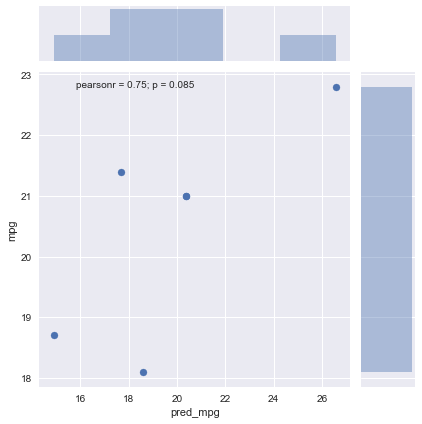

In [34]:
sns.jointplot('pred_mpg', 'mpg', data=mtcars_new)

## Linear Regression Assumptions

* Assumptions: this is key
* Normality
* Independence
* Linearity
* Homoscedasticity (pull this off in scrabble)
* What's all this about assumptions. . . If I get numbers out it worked. . .

## Homoscedasticity

This is the assumption of constant variance. This can be violated, especially when we have a wide range of data. Here is a simulated example so you can see the issue:

In [35]:
df_spread = pd.read_csv(r'data\hetero_out.csv')

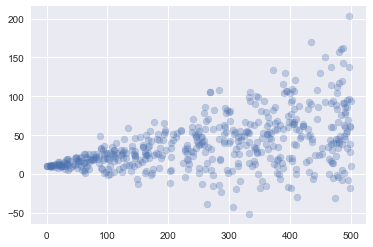

In [36]:
plt.scatter(df_spread.x,df_spread.out2,alpha=0.3)

Sometimes we may use the log function to 'stabalize' the variance. This is commonly suggested, but you must be careful of the interpretation of your results after this...(more on this in subsequent lectures). 

C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


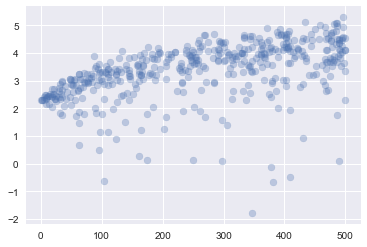

In [37]:
plt.scatter(df_spread.x,np.log(df_spread.out2),alpha=0.3)

In this outcome, there is an issue with both non-constant variance and linearity:

In [38]:
plt.scatter(df_spread.x,df_spread.out3,alpha=0.3)

C:\Users\evan\Miniconda3\envs\py3ds\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


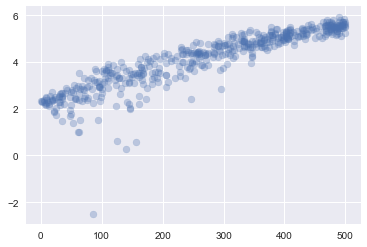

In [39]:
plt.scatter(df_spread.x,np.log(df_spread.out3),alpha=0.3)